# PDBe API Training

## Introduction

This interactive Python notebook will guide you through programmatically accessing Protein Data Bank in Europe (PDBe) data using our REST API.

The REST API is a programmatic way to obtain information from the PDB and EMDB archives. It allows you to access and filter the vast amount of data stored about the protein structures stored in the archives. 

Many types of information about the structures stored are made available through structured data categories. For example, you can access information about:
* sample details
* experimental setup
* model quality
* bound compounds
* assembly formation
* cross-references
* publications
* and much more...

For more information, visit https://pdbe.org/api

---
---

## Setup and Python Fundamentals

First we will import the libraries we need for searching the PDBe via an API. The PDBe's 
API search infrustructure runs on Solr, which can be queried using a dedicated client or 
with Python's default `requests` library, where searches can be 'posted' to the API. 
Here, we will use a dedicated client called [`solrq`](https://pypi.org/project/solrq/), 
which will format our search terms into a Solr-compliant format. There are many other 
Solr clients to choose from but they should all return the same data from the PDBe. 

If you're new to Python and want to learn how to use Python's default `requests` 
library, head to the Jupyter Notebooks in the `extra_api_tutorials` folder. 

Run the cell below by pressing the play button or `Ctrl+Enter`.

In [1]:
from solrq import Q

Next, let's import some additional libraries that we'll need for parsing data and 
sending our API query off to the PDBe. 

Run the cell below by pressing the play button or `Ctrl+Enter`.

In [2]:
from pprint import pprint
import sys
import requests
sys.path.insert(0,'..')

Now, you have access to additional functions and objects that were not, by default, 
loaded into your code. In other words, you have pulled into this file code written in 
`sys`, `pprint` and `requests`, saving you from re-writing them yourself. 

Nevertheless, you can write your own functions in python using the `def` keyword. Below 
is an example of a new function, called `make_request_post` written specifically for 
this notebook, that sends off a query to the PDBe's Solr API and retrieves data.

Run the cell below by pressing the play button or `Ctrl+Enter`.

In [3]:
BASE_URL = "https://www.ebi.ac.uk/pdbe/"  # the beginning of the URL for PDBe's API.
SEARCH_URL = BASE_URL + 'search/pdb/select?'  # the rest of the URL used for PDBe's search API.

def make_request_post(search_dict, number_of_rows=10):
    """
    Makes a get request to the PDBe API
    """
    
    if 'rows' not in search_dict:
        search_dict['rows'] = number_of_rows

    search_dict['wt'] = 'json'
    response = requests.post(SEARCH_URL, data=search_dict)

    if response.status_code == 200:
        return response.json()
    
    else:
        print("[No data retrieved - %s] %s" % (response.status_code, response.text))

    return {}

#### _Explaining functions_

Functions are an essential component of programming languages and Python is no 
exception. They allow us to create a block of instructions that can be called and 
enacted somewhere else (maybe many places) without us having to re-write every line 
again. Consider the `print` function; it's a block of code that displays variables on a
 terminal that you can call anywhere without needing to think about how it displays that 
variable. By using `def`, we achieve a similar result by writing our own code and then 
calling it anywhere in our script. 

Functions might accept inputs, called 'arguments', whenever they are called. The 
function above accepts two arguments, `search_dict` and `number_of_rows`. By default, we 
have set `number_of_rows` to `10`, but this can be changed when the function is called. 

Functions can also `return` values, which we can set to variables. Below is an abstract 
example:


```python
# Sets a new variable to the result of 2x2x2
eight = cube(2)
```

Now we have defined a function to send a request to the PDBe's API, we need to format 
the fields and terms we intend to perform our search with. This requires some processing
 that could be run every time we send off our query, but it will save us time and lines 
of code to add this to its own function. 

Below is a function to format a set of search terms into an appropriate data structure 
everytime we need to query the PDBe API. In order to use this function elsewhere in the 
notebook, run the code block below to loan it into memory. 

In [4]:
def format_search_terms_post(search_terms, filter_terms=None, **kwargs):
    """
    Formats the search terms for the PDBe API
    """

    # Variable to return
    ret = {'q': str(search_terms)}

    if filter_terms:
        fl = ','.join(filter_terms)
        ret['fl'] = fl

    for arg in kwargs:
        ret[arg] = kwargs[arg]

    return ret

Finally, we can package these two functions into a single command (another function...) 
that makes querying as simple as typing `run_search` every time we need data to retrieve
data

In [5]:
def run_search(search_terms, filter_terms=None, number_of_rows=10, **kwargs):
    """
    Run the search with set of search terms
    """

    search_params = format_search_terms_post(search_terms=search_terms, filter_terms=filter_terms)
    
    if search_params:
        response = make_request_post(search_dict=search_params, number_of_rows=number_of_rows)

        if response:
            results = response.get('response', {}).get('docs', [])
            print(f'Number of results for {search_terms}: {len(results)}')
            return results

    print('No results')
    return []

____
---

## Initial testing

Now we are ready to run a search against the PDB API for entries containing Acetylcholinesterase from *Homo sapiens*  from  in the PDB. 

A list of search terms is available at:
https://www.ebi.ac.uk/pdbe/api/doc/search.html

For this task we will search for the molecule name "Acetylcholinesterase" in the PDB.

To run the search above we first need to set the query parameters using the module Q, which stands for query. Once these have been set, we can use the "run_search" function that we defined above to perform the API query and return the results.

By default we have limited the length of the results to 10 rows. 

In [6]:
# Create the Solr search terms object
search_terms = Q(molecule_name='Acetylcholinesterase')

# Run the search
initial_results = run_search(search_terms)
print("Finished")

Number of results for molecule_name:Acetylcholinesterase: 10
Finished


Not all queries will return valuable results.

What if we try to search for something that doesn't exist?

In [7]:
# The Solr search object can be created with the incorrect search term, 'bob'
search_terms = Q(bob="Acetylcholinesterase")

# Run the erroneous search
bad_results = run_search(search_terms)
print("Finished")

Number of results for bob:Acetylcholinesterase: 0
Finished


In [8]:
# The search term is now correct, but the value is incorrect
search_terms = Q(molecule_name="bob")

# Run the erroneous search and see what you get
empty_results = run_search(search_terms)
print("Finished")

Number of results for molecule_name:bob: 0
Finished


What if we define the search terms incorrectly? (Hint: This will fail!)

In [9]:
search_terms = Q('bob')
bad_results = run_search(search_terms)

AttributeError: 'str' object has no attribute 'compile'

---
---

## Refining the query

We can make the search results more specific by adding additional query parameters.

Here we will try to add organism_name "Homo sapiens" to the query to limit the results to only return those that are structures of the human Acetylcholinesterase.

In [10]:
search_terms = Q(organism_name='Homo sapiens', molecule_name='Acetylcholinesterase')
refined_results = run_search(search_terms)

Number of results for organism_name:Homo\ sapiens AND molecule_name:Acetylcholinesterase: 10


How did we know which search terms to use?

There are many parameters that can be used to filter the results of a search. To find useful data requires an understanding of the data available.


Exploring the data available is an essential part of the process, all the search terms can be found here:

https://www.ebi.ac.uk/pdbe/api/doc/search.html

For more complicated queries have a look at the documentation:

https://solrq.readthedocs.io/en/latest/index.html

---
---


## Exploring the results

Once a set of results have been obtained, they can be explored in more detail.

We will now look at individual protein structures returned in the refined_results.

The following code returns all the data associated with the first protein structure found in the refined_results. It uses "pprint" (pretty print) to make the results easier to read.

All of the "keys" on the left side of the results can be used as a search term.

In [11]:
pprint(refined_results[0])

{'_version_': 1788796062450843648,
 'abstracttext_unassigned': ['Organophosphorus (OP) compounds, including nerve '
                             'agents and some pesticides, covalently bind to '
                             'the catalytic serine of human '
                             'acetylcholinesterase (hAChE), thereby inhibiting '
                             'acetylcholine hydrolysis necessary for efficient '
                             'neurotransmission. Oxime antidotes can '
                             'reactivate the OP-conjugated hAChE, but '
                             'reactivation efficiency can be low for '
                             'pesticides, such as paraoxon (POX). '
                             'Understanding structural and dynamic '
                             'determinants of OP inhibition and reactivation '
                             'can provide insights to design improved '
                             'reactivators. Here, X-ray structures of hAChE '
 

There are many terms with the prefixes "q_" and "t_". These are only used for internal processes in PDBe and so can be ignored. 

Below we will find all the search terms that might be useful when querying the data (excludes the "q_" and "t_" search terms).

In [12]:
useful_search_terms = []
for term in refined_results[0].keys():
    if not term.startswith('q_') and not term.startswith('t_'):
        useful_search_terms.append(term)

print(
    f"There are {len(useful_search_terms)} available search terms ",
    '(excluding "q_" and "t_" terms)'
)

There are 225 available search terms  (excluding "q_" and "t_" terms)


and then print out the terms we can use:

In [13]:
pprint(useful_search_terms)

['abstracttext_unassigned',
 'all_assembly_composition',
 'all_assembly_form',
 'all_assembly_id',
 'all_assembly_mol_wt',
 'all_assembly_type',
 'all_authors',
 'all_molecule_names',
 'all_num_interacting_entity_id',
 'assembly_composition',
 'assembly_form',
 'assembly_id',
 'assembly_mol_wt',
 'assembly_num_component',
 'assembly_symmetry',
 'assembly_type',
 'beam_source_name',
 'biological_cell_component',
 'all_go_terms',
 'biological_function',
 'biological_process',
 'bound_compound_id',
 'bound_compound_name',
 'bound_compound_synonym',
 'bound_compound_systematic_name',
 'bound_compound_weight',
 'cell_a',
 'cell_alpha',
 'cell_b',
 'cell_beta',
 'cell_c',
 'cell_gamma',
 'chain_id',
 'citation_authors',
 'citation_doi',
 'citation_title',
 'citation_year',
 'complex_id',
 'complex_name',
 'complex_name_source',
 'complex_string',
 'compound_id',
 'compound_name',
 'all_compound_names',
 'compound_synonym',
 'compound_systematic_name',
 'compound_weight',
 'crystallisation_co

As you can see we get lots of data back about the individual molecule we have searched for and the PDB entries
in which it is contained.

For example, we can get the PDB ID and structure resolution for this first result as follows:

In [14]:
print(f"PDB ID:     {refined_results[0].get('pdb_id')}")
print(f"Resolution: {refined_results[0].get('resolution')}")

PDB ID:     8dt2
Resolution: 2.803


---
---

## Filtering the output data

There are too many different terms to look through so we can restrict the results to only the information we want
using a filter so its easier to see the information we want.

In [15]:
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id', 'resolution']

resolution_results = run_search(search_terms, filter_terms)
pprint(resolution_results)

Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 10
[{'pdb_id': '8dt2', 'resolution': 2.803},
 {'pdb_id': '7p1p', 'resolution': 3.03},
 {'pdb_id': '7p1p', 'resolution': 3.03},
 {'pdb_id': '8dt5', 'resolution': 2.6},
 {'pdb_id': '8dt4', 'resolution': 2.8},
 {'pdb_id': '6o52', 'resolution': 3.2},
 {'pdb_id': '6ntm', 'resolution': 2.552},
 {'pdb_id': '6nea', 'resolution': 2.419},
 {'pdb_id': '6o4w', 'resolution': 2.35},
 {'pdb_id': '6ntl', 'resolution': 2.25}]


---
---


## Reformatting the results

While we were exploring the data we restricted the number of entries in the output to 10 rows. This allows us to get the results more quickly. Once we have refined our query parameters we can increase this limit.

Now we have a refined query, lets increase the output to 1000 rows. We will then increase the number of rows to 1000 - depending on the search we might get fewer than 1000 results back

**--This fulfils Project Aim 1A--**

In [16]:
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id', 'resolution', 'release_year']

project_aim_1a_results = run_search(search_terms,filter_terms, number_of_rows=1000)
pprint(project_aim_1a_results)

Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 78
[{'pdb_id': '8dt2', 'release_year': 2022, 'resolution': 2.803},
 {'pdb_id': '7p1p', 'release_year': 2021, 'resolution': 3.03},
 {'pdb_id': '7p1p', 'release_year': 2021, 'resolution': 3.03},
 {'pdb_id': '8dt5', 'release_year': 2022, 'resolution': 2.6},
 {'pdb_id': '8dt4', 'release_year': 2022, 'resolution': 2.8},
 {'pdb_id': '6o52', 'release_year': 2019, 'resolution': 3.2},
 {'pdb_id': '6ntm', 'release_year': 2020, 'resolution': 2.552},
 {'pdb_id': '6nea', 'release_year': 2019, 'resolution': 2.419},
 {'pdb_id': '6o4w', 'release_year': 2019, 'resolution': 2.35},
 {'pdb_id': '6ntl', 'release_year': 2020, 'resolution': 2.25},
 {'pdb_id': '6o5s', 'release_year': 2019, 'resolution': 2.801},
 {'pdb_id': '6o5v', 'release_year': 2019, 'resolution': 2.152},
 {'pdb_id': '6nto', 'release_year': 2020, 'resolution': 2.052},
 {'pdb_id': '8dt7', 'release_year': 2022, 'resolution': 2.207},
 {'pdb_id': '6ntk', '

We are going to use a Python package called Pandas to help us analyse and visualise the 
results. Pandas is a library for handling tabular data and also has built-in graphing 
capability (forked from a package called [`matplotlib`](https://matplotlib.org/stable/)).
Begin by importing the Pandas library using the code below:

In [17]:
# Imports pandas and set its name to pd
import pandas as pd

The `... as pd` part in the code block above resets the name to `pd`. This is a common 
shorthand when using Pandas but is optional. 

In [18]:
def pandas_dataset(list_of_results):
    """
    Updates lists to strings for loading into Pandas
    """
    for row in list_of_results:
        for data in row:
            if type(row[data]) == list:
                # If there are any numbers in the list change them into strings
                row[data] = [str(a) for a in row[data]]

                # Unique and sort the list and then change the list into a string
                row[data] = ','.join(sorted(list(set(row[data]))))

    df = pd.DataFrame(list_of_results)
    return df

In [19]:
df_1a_results = pandas_dataset(list_of_results=project_aim_1a_results)
print(df_1a_results)

   pdb_id  release_year  resolution
0    8dt2          2022       2.803
1    7p1p          2021       3.030
2    7p1p          2021       3.030
3    8dt5          2022       2.600
4    8dt4          2022       2.800
..    ...           ...         ...
73   7xn1          2023       2.850
74   8aen          2023       3.010
75   7rb6          2021       2.400
76   7rb5          2021       2.800
77   8aev          2023       2.890

[78 rows x 3 columns]


We can save the results to a CSV file which we can load into excel

In [20]:
df_1a_results.to_csv("search_results_project_aims_1a.csv")
print('Search results written in to file: search_results_project_aims_1a.csv')

Search results written in to file: search_results_project_aims_1a.csv


---
---

## Analysing and plotting the results

We can use the this to count how many PDB codes there are for each resolution
This groups PDB IDs by resolution value and then counts the number of unique PDB IDs per method.

In [21]:
df_1a_results.groupby('resolution')['pdb_id'].nunique()

resolution
2.000000    1
2.052000    1
2.081000    1
2.152000    2
2.156000    1
2.190000    1
2.200000    1
2.201000    1
2.207000    1
2.216000    1
2.250000    2
2.253000    1
2.273000    1
2.278000    1
2.289000    1
2.300000    2
2.301200    1
2.304000    1
2.308000    2
2.350000    2
2.350900    1
2.352000    1
2.372000    1
2.398300    1
2.400000    4
2.406000    1
2.419000    1
2.421000    1
2.449000    1
2.450000    2
2.452000    1
2.460000    1
2.500000    1
2.552000    1
2.595800    1
2.599000    1
2.600000    3
2.601000    1
2.630000    1
2.652000    1
2.660000    1
2.697000    1
2.760000    1
2.800000    4
2.801000    1
2.803000    1
2.850000    2
2.890000    1
2.900000    2
2.950000    2
3.000000    2
3.010000    1
3.030000    1
3.051997    1
3.104000    1
3.200000    2
Name: pdb_id, dtype: int64

We can then plot these results in a variety of ways using pandas:

In [22]:
def pandas_plot(df, column_to_group_by, graph_type='bar'):
    ds = df.groupby(column_to_group_by)['pdb_id'].nunique()
    ds.plot(kind=graph_type)

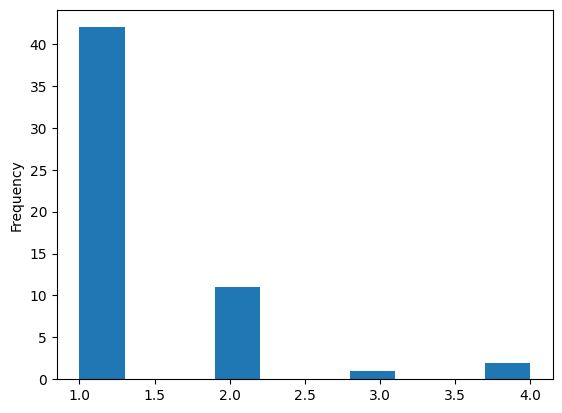

In [23]:
# Plot resolution as a histogram
pandas_plot(
    df=df_1a_results,
    column_to_group_by='resolution',
    graph_type='hist'
)

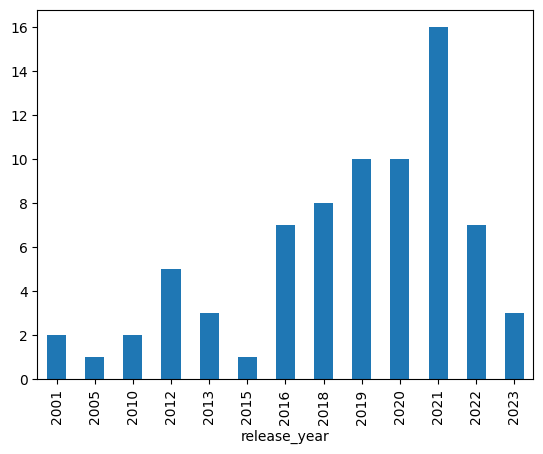

In [24]:
# Plot release year as a bar chart
pandas_plot(
    df=df_1a_results,
    column_to_group_by='release_year',
    graph_type='bar'
)

A line plot might make more sense for this data:

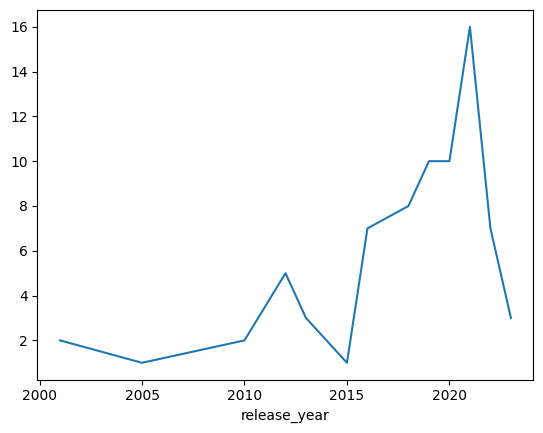

In [25]:
# Plot release year as a line chart
pandas_plot(
    df=df_1a_results,
    column_to_group_by='release_year',
    graph_type='line'
)

---
---

## Searching for interacting macromolecules

We can now use what we have learnt to obtain the data other project aims:

**--The following search fulfils Project Aim 1B--**

In [26]:
# Obtain Project Aim 1B results
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id','interacting_uniprot_accession']
project_aim_1b_results = run_search(search_terms, filter_terms, number_of_rows = 1000)

Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 78


In [27]:
# Reformat and write results to file
df_1b_results = pandas_dataset(list_of_results=project_aim_1b_results)
df_1b_results.to_csv("search_results_project_aims_1b.csv")

print('Search results written in to file: search_results_project_aims_1b.csv')

Search results written in to file: search_results_project_aims_1b.csv


In [28]:
# Print results
pprint(project_aim_1b_results)

[{'pdb_id': '8dt2'},
 {'interacting_uniprot_accession': 'P22303', 'pdb_id': '7p1p'},
 {'interacting_uniprot_accession': 'P22303', 'pdb_id': '7p1p'},
 {'pdb_id': '8dt5'},
 {'pdb_id': '8dt4'},
 {'pdb_id': '6o52'},
 {'pdb_id': '6ntm'},
 {'pdb_id': '6nea'},
 {'pdb_id': '6o4w'},
 {'pdb_id': '6ntl'},
 {'pdb_id': '6o5s'},
 {'pdb_id': '6o5v'},
 {'pdb_id': '6nto'},
 {'pdb_id': '8dt7'},
 {'pdb_id': '6ntk'},
 {'pdb_id': '6ntg'},
 {'pdb_id': '6ntn'},
 {'pdb_id': '6o5r'},
 {'pdb_id': '6o66'},
 {'pdb_id': '6o4x'},
 {'interacting_uniprot_accession': 'P22303', 'pdb_id': '7p1n'},
 {'interacting_uniprot_accession': 'P22303', 'pdb_id': '7p1n'},
 {'pdb_id': '4ey4'},
 {'interacting_uniprot_accession': 'P0C1Z0', 'pdb_id': '2x8b'},
 {'pdb_id': '3lii'},
 {'pdb_id': '4ey5'},
 {'pdb_id': '4ey7'},
 {'pdb_id': '4ey6'},
 {'interacting_uniprot_accession': 'P0C1Z0', 'pdb_id': '4ey8'},
 {'pdb_id': '5hf5'},
 {'pdb_id': '5hf6'},
 {'pdb_id': '5fpq'},
 {'pdb_id': '7d9q'},
 {'pdb_id': '5hf9'},
 {'pdb_id': '5hfa'},
 {'inte

**--The following search fulfils Project Aim 1C--**

In [29]:
# Obtain Project Aim 1C results
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id','interacting_ligands']
project_aim_1c_results = run_search(search_terms, filter_terms, number_of_rows = 1000)

Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 78


In [30]:
# Reformat and write results to file
df_1c_results = pandas_dataset(list_of_results=project_aim_1c_results)
df_1c_results.to_csv("search_results_project_aims_3.csv")

print('Search results written in to file: search_results_project_aims_1c.csv')

Search results written in to file: search_results_project_aims_1c.csv


In [31]:
# Print results
pprint(project_aim_1c_results)

[{'interacting_ligands': 'DEP : DIETHYL PHOSPHONATE,DMS : DIMETHYL '
                         'SULFOXIDE,GOL : GLYCEROL',
  'pdb_id': '8dt2'},
 {'interacting_ligands': '4IX : '
                         '(2R,3R,4S,5S,6R)-2-[4-[1-[3-[6-[(Z)-hydroxyiminomethyl]-5-oxidanyl-pyridin-2-yl]propyl]-1,2,3-triazol-4-yl]butoxy]-6-(hydroxymethyl)oxane-3,4,5-triol,CL '
                         ': CHLORIDE ION,GAL : beta-D-galactopyranose,NAG : '
                         '2-acetamido-2-deoxy-beta-D-glucopyranose,SIA : '
                         'N-acetyl-alpha-neuraminic acid,SO4 : SULFATE ION',
  'pdb_id': '7p1p'},
 {'interacting_ligands': '4IX : '
                         '(2R,3R,4S,5S,6R)-2-[4-[1-[3-[6-[(Z)-hydroxyiminomethyl]-5-oxidanyl-pyridin-2-yl]propyl]-1,2,3-triazol-4-yl]butoxy]-6-(hydroxymethyl)oxane-3,4,5-triol,BMA '
                         ': beta-D-mannopyranose,CL : CHLORIDE ION,FUC : '
                         'alpha-L-fucopyranose,GAL : beta-D-galactopyranose,MG '
                   

---
---

### Optional extras

Some data is only available through the search API and not the web interface.

One example of this is the additional information made available about antibodies:

In [32]:
search_terms = Q(antibody_flag='Y')
filter_terms = ['antibody_name', 'antibody_species', 'pdb_id']

antibody_results = run_search(
    search_terms, 
    filter_terms=filter_terms, 
    number_of_rows=1000000
)

Number of results for antibody_flag:Y: 16386


With this data we can explore it by grouping the column values:

In [33]:
df_antibody_results = pandas_dataset(antibody_results)
print(df_antibody_results)

# Count number of entries containing an antibody
ds_antibody_entries = df_antibody_results.groupby('pdb_id').count()
print(
    f"""
    Number of antibody entries: {len(ds_antibody_entries)}
    """
)

# Count all the species which an antibody has been obtained from 
ds_antibody_species = df_antibody_results.groupby('antibody_species').count()
print(
    f"""
    Antibody entries broken down by species: 
    {ds_antibody_species['antibody_name']}
    """
)

              antibody_name antibody_species pdb_id
0            IG-heavy chain            human   7qji
1            IG-heavy chain            human   7qji
2            IG-heavy chain            mouse   8dcn
3      IG-light kappa chain            mouse   8dcn
4            IG-heavy chain            human   8d50
...                     ...              ...    ...
16381        IG-heavy chain            human   7woa
16382  IG-light kappa chain            human   7woa
16383  IG-light kappa chain            mouse   7uko
16384        IG-heavy chain            mouse   7tqb
16385  IG-light kappa chain            human   7tqb

[16386 rows x 3 columns]

Number of antibody entries: 8763


Antibody entries broken down by species: 
antibody_species
human          11600
human,mouse      406
mouse           4380
Name: antibody_name, dtype: int64

